# Regression Modeling: Walmart Sales Prediction
#### Author: Zachary Raup

### Introduction

Accurate weekly sales predictions are vital in retail for efficient inventory management, precise demand forecasting, and maximizing profitability. Sales are influenced by numerous factors, including store-specific attributes, seasonal trends, and external market conditions, making predictions a complex task. This project leverages machine learning to address this challenge, applying and comparing multiple regression models to uncover patterns and predict sales more effectively than traditional methods. By evaluating the performance of these models, the project aims to identify the most reliable approach for improving decision-making and operational efficiency across retail stores.

### Problem Statement 

The goal of this project is to predict weekly sales for retail stores using store features. Accurate predictions help businesses manage inventory, plan marketing, and allocate resources effectively. The challenge is to find a model that captures the relationships between store attributes and sales while maintaining accuracy and reliability.

### Data Overview


The dataset, sourced from Kaggle, contains weekly sales data for various Walmart stores from 2010 to 2012, along with store-specific and economic features. The columns in the dataset are as follows:

- **Store:** The store number.
- **Date:** The week corresponding to the sales.
- **Weekly_Sales:** Total sales for the given store in a specific week.
- **Holiday_Flag:** Indicates if the week has a special holiday (1 for Yes, 0 for No).
- **Temperature**: Average temperature for the week.
- **Fuel_Price:** Cost of fuel in the region of the store.
- **CPI:** Consumer Price Index for the region.
- **Unemployment:** Prevailing unemployment rate (in percentage).

The objective is to predict Weekly_Sales based on these features. Covering two years of data across multiple stores, this dataset provides a comprehensive foundation for training regression models to forecast retail sales effectively.

#### Import Libraries for Analysis and Modeling

In [1]:
# Import necessary libraries
import os
import warnings
warnings.filterwarnings("ignore")

# Import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing and modeling tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor


### Retrieving the Walmart Dataset
This section retrieves the Walmart dataset from the specified file path, loads it into a DataFrame, and displays the first 10 rows for preview.

In [2]:
# Display file paths in the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load Walmart dataset
data_path = '/kaggle/input/walmart-dataset/Walmart.csv'  # Path to the dataset
df = pd.read_csv(data_path)

# Preview dataset
df.head(10)

/kaggle/input/walmart-dataset/Walmart.csv


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


### Understanding the Dataset
The following code provides an overview of the dataset, displaying its shape (number of rows and columns) along with detailed information about the columns and their data types.

In [3]:
# Display the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Display column information and data types for clarity
print("\nDataset Information:")
df.info()

The dataset contains 6435 rows and 8 columns.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Display summary statistics for all numeric columns
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### Data Cleaning
This section focuses on cleaning the dataset by performing key tasks: converting the 'Date' column to datetime format, identifying missing values, checking for duplicate rows, and detecting outliers in numeric columns. The outlier detection is achieved by calculating the Interquartile Range (IQR) and identifying values outside the typical range, helping to ensure data quality for modeling.

In [5]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Verify the column has been converted to datetime
print(df['Date'].dtype)

datetime64[ns]


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [7]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate rows found:\n", duplicates)

Duplicate rows found:
 Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []


**Observation**:
 - No missing values detected.
 - No duplicate rows found.

Now we can check for outliers in the data.

##### Outlier Detection and Analysis

In [8]:
# Define functions for detecting outliers
def find_outlier_rows(df, col, level='both'):
    
    # Calculate the Interquartile Range (IQR)
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    # Calculate the lower bound for outliers
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    # Calculate the upper bound for outliers
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr

    # Return rows with lower outliers if level is 'lower'
    if level == 'lower':
        return df[df[col] < lower_bound]
    # Return rows with upper outliers if level is 'upper'
    elif level == 'upper':
        return df[df[col] > upper_bound]
    # Return rows with any outliers if level is 'both'
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]
        

# Count outliers for each numeric column
def count_outliers(df):

    # Select only numeric columns (int or float) from the DataFrame
    df_numeric = df.select_dtypes(include=['int', 'float'])

    # Get the names of all numeric columns
    columns = df_numeric.columns

    # Identify columns that contain at least one outlier
    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]
    
    # Create an empty DataFrame to store the results
    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

    # Loop through each column with outliers
    for col in outlier_cols:
        # Count the number of outliers in the column
        outlier_count = len(find_outlier_rows(df_numeric, col))
        # Get the total number of entries in the column
        all_entries = len(df[col])
        # Calculate the percentage of outliers in the column
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        # Add the column's results to the outliers DataFrame
        outliers_df.loc[col] = [outlier_count, outlier_percent]

    # Return the DataFrame containing outlier counts and percentages
    return outliers_df


# Call the count_outliers function and sort the result by the number of outliers in descending order
count_outliers(df).sort_values('outlier_counts', ascending=False)


,outlier_counts,outlier_percent
Unemployment,481.0,7.47
Holiday_Flag,450.0,6.99
Weekly_Sales,34.0,0.53
Temperature,3.0,0.05


Let’s investigate the outliers in each column to decide on how to handle them.

In [9]:
# Get summary statistics for the Unemployment column outliers to understand the distribution and characteristics of the detected outlier values.
find_outlier_rows(df, 'Unemployment')['Unemployment'].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: Unemployment, dtype: float64

In [10]:
# Get summary statistics for the Holiday_Flag column outliers
find_outlier_rows(df, 'Holiday_Flag')['Holiday_Flag'].describe()

count    450.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Holiday_Flag, dtype: float64

In [11]:
# Get summary statistics for the Weekly_Sales column outliers
find_outlier_rows(df, 'Weekly_Sales')['Weekly_Sales'].describe()

count    3.400000e+01
mean     3.086723e+06
std      3.794367e+05
min      2.727575e+06
25%      2.767649e+06
50%      2.913971e+06
75%      3.474992e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [12]:
# Get summary statistics for the Temperature column outliers
find_outlier_rows(df, 'Temperature')['Temperature'].describe()

count    3.000000
mean     3.236667
std      4.600004
min     -2.060000
25%      1.740000
50%      5.540000
75%      5.885000
max      6.230000
Name: Temperature, dtype: float64

**Observations**:
 - The 'Unemployment' column has 481 outliers (7.47% of rows), but are realistic and will remain for analysis.
 - The 'Holiday_Flag' column's outliers represent special holiday weeks.
 - Other columns have minimal outliers and are obtainable and will remain for analysis.

### Feature Engineering
This section focuses on enhancing the dataset by creating new features that may provide better insights for analysis. The 'Date' column is split into separate 'Year', 'Month', and 'Day' columns for temporal analysis. Additionally, an 'Employment' feature is derived from the existing 'Unemployment' rate, which is calculated as the complement of unemployment (100 - Unemployment rate). These new features enable more granular analysis of sales data and potentially reveal patterns linked to time and employment trends.

In [13]:
# Create new features for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Employment'] = 100 - df['Unemployment']  # Employment rate derived from unemployment


# Preview the dataset with new features
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Employment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,91.894
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,91.894
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,91.894


### Exploratory Data Analysis
This section conducts an in-depth analysis of the dataset, using summary statistics and visualizations to explore the relationships, trends, and distributions of key features. Insights include the seasonality of sales, feature correlations, and the impact of holidays on weekly sales, providing a foundation for selecting and engineering relevant predictors for modeling.

##### Summary Statistics and Visualizations

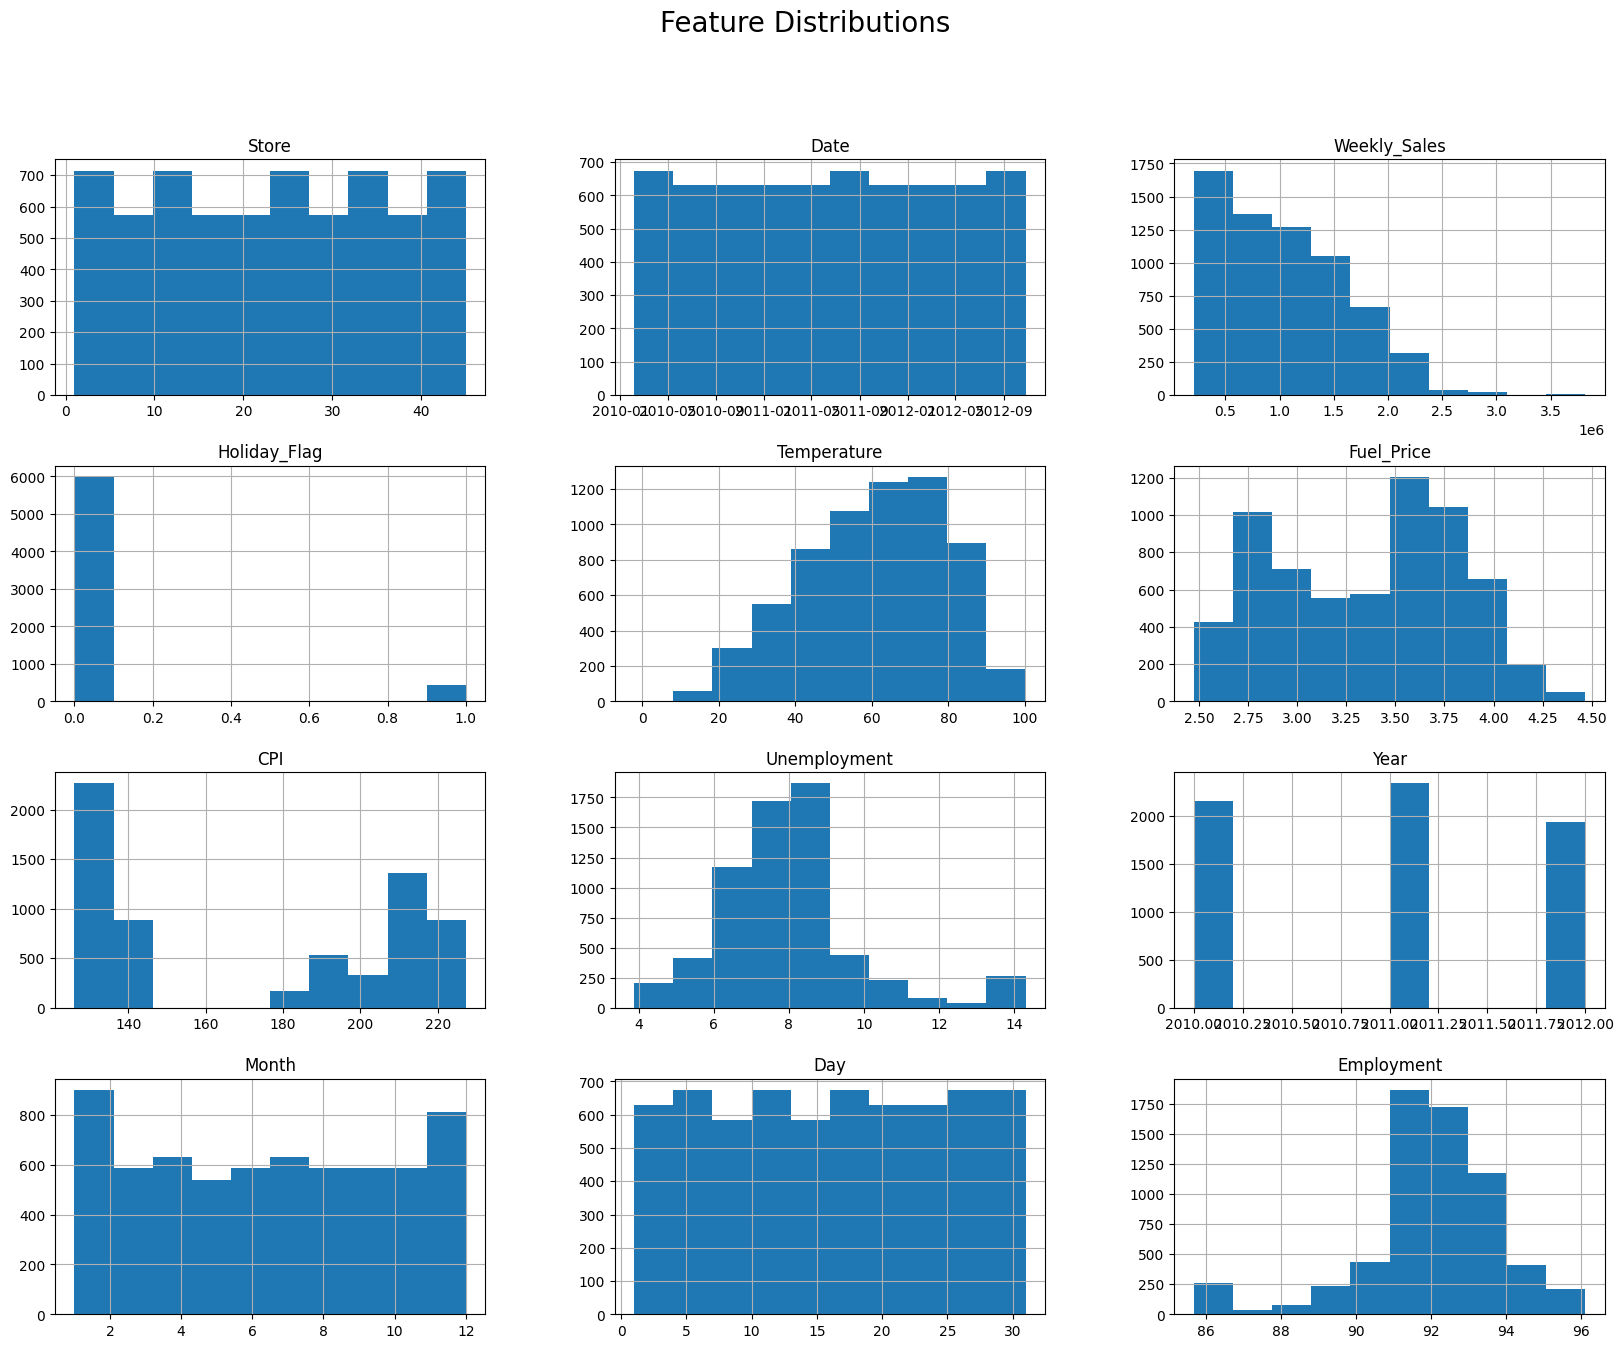

In [14]:
# Summary statistics
df.describe()

# Histograms of features
df.hist(figsize=(20, 15))
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()

 **Observations**:
 - Weekly sales are right-skewed with some weeks exceeding $2M.
 - Temperature has a normal distribution.
 - CPI and fuel price exhibit bimodal behavior.

##### Weekly Sales Trends Over Time

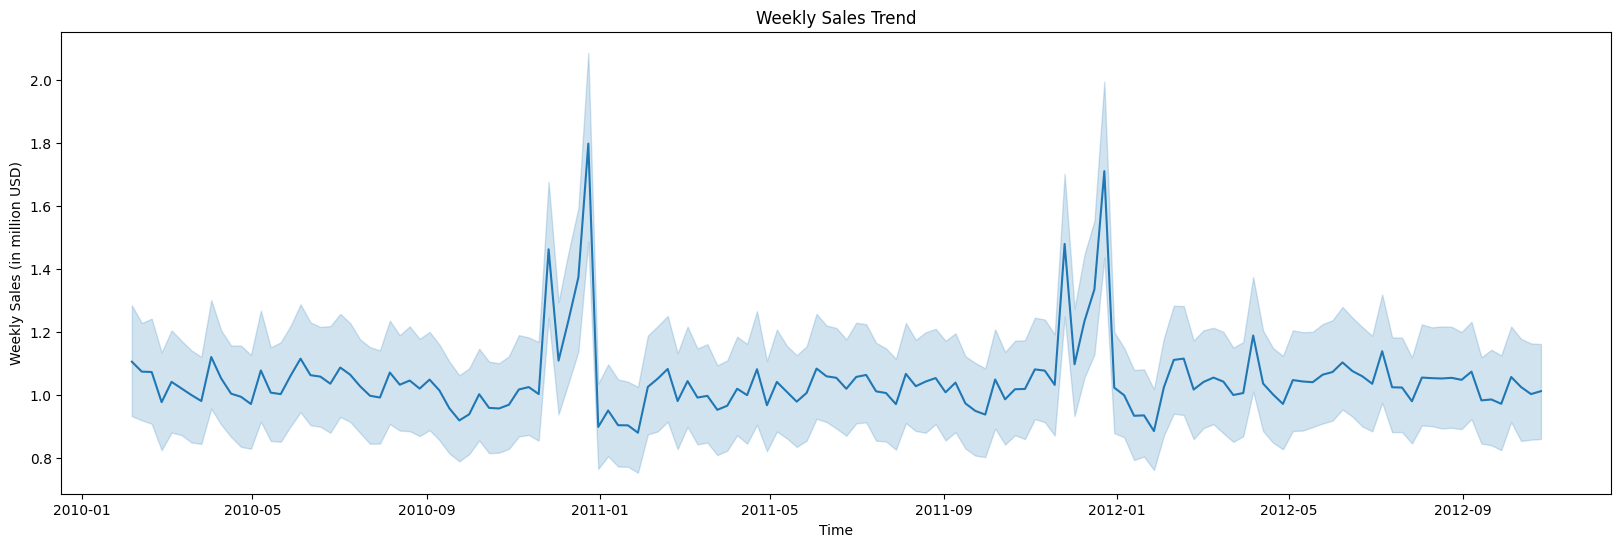

In [15]:
# Visualize weekly sales trends over time
plt.figure(figsize=(20, 6))
sns.lineplot(x=df['Date'], y=df['Weekly_Sales'] / 1e6)
plt.xlabel('Time')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend')
plt.show()

**Observations**:
 - Peaks in sales occur in November and December, suggesting seasonality.

##### Monthly and Yearly Seasonality

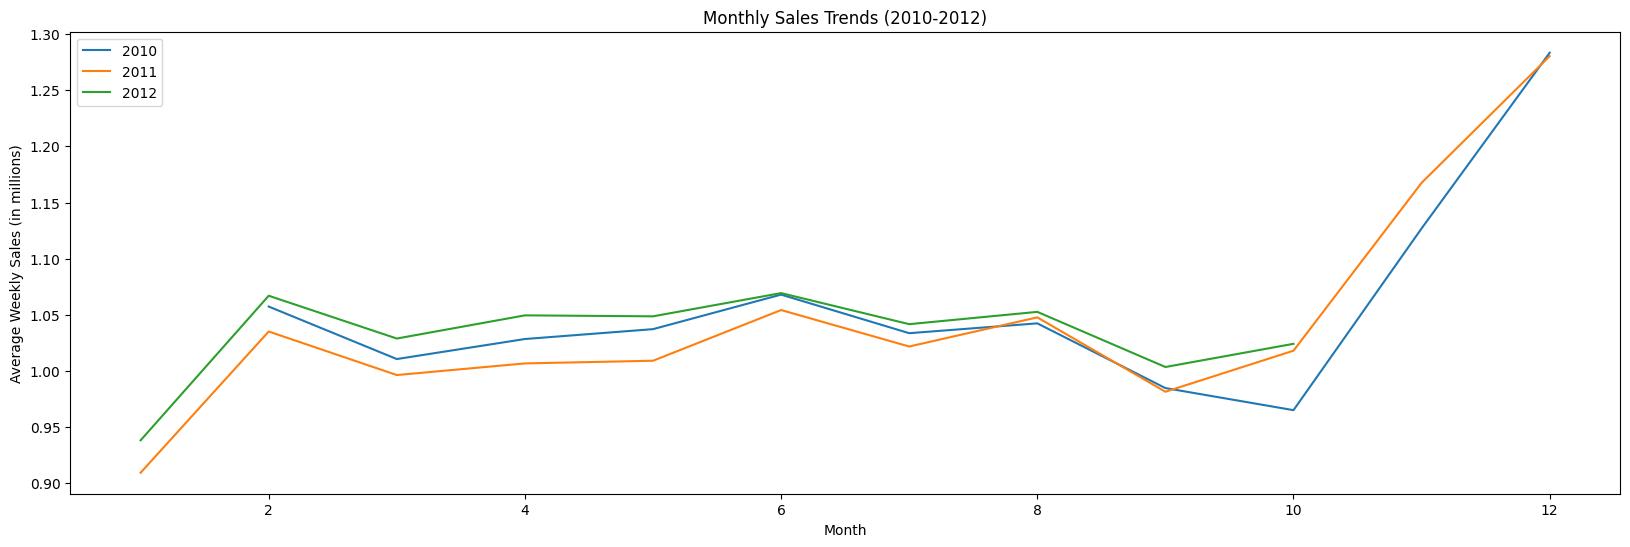

Year,2010,2011,2012
Month,,,
1,NaN,9.094665e+05,9.383026e+05
2,1.057405e+06,1.035174e+06,1.067020e+06
3,1.010666e+06,9.964247e+05,1.028932e+06
4,1.028499e+06,1.006784e+06,1.049561e+06
5,1.037283e+06,1.009156e+06,1.048703e+06
6,1.068034e+06,1.054297e+06,1.069379e+06
7,1.033689e+06,1.021828e+06,1.041719e+06
8,1.042445e+06,1.047774e+06,1.052670e+06
9,9.848216e+05,9.815455e+05,1.003586e+06


In [16]:
# Pivot table for average weekly sales by month and year
pivot_table = df.pivot_table(index='Month', columns='Year', values='Weekly_Sales')

# Visualize seasonality
plt.figure(figsize=(20, 6))
for year in pivot_table.columns:
    sns.lineplot(x=pivot_table.index, y=pivot_table[year] / 1e6, label=str(year))

plt.ylabel('Average Weekly Sales (in millions)')
plt.title('Monthly Sales Trends (2010-2012)')
plt.legend()
plt.show()

pivot_table

**Observation** 
- Each year follows a similar month to month pattern of Weekly Sales
- Max of weekly sales in months of November and December followed by the minimum in the month of January.

##### Sales by Each Store

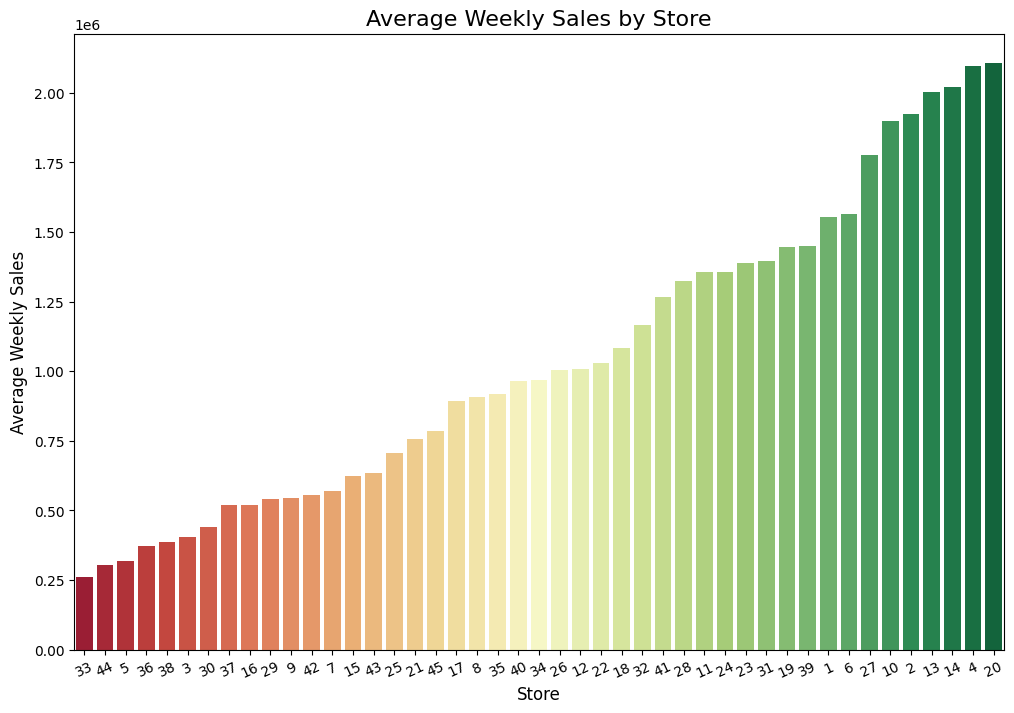

In [17]:
# Group by 'Store' and calculate the mean of numeric columns
sales_store = df.groupby('Store').mean()

# Sort by 'Weekly_Sales' in descending order (highest sales first)
sales_store = sales_store.sort_values(by='Weekly_Sales', ascending=True)

# Reset the index to make 'Store' a column again
sales_store = sales_store.reset_index()

# Create a color palette that transitions from red (low) to green (high)
colors = sns.color_palette("RdYlGn", n_colors=len(sales_store))

# Plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Create a bar plot, sorted by 'Weekly_Sales' values
sns.barplot(x='Store', y='Weekly_Sales', data=sales_store, palette=colors, order=sales_store['Store'])

# Add labels and title
plt.title('Average Weekly Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)
plt.xticks(rotation=25, fontsize=10)  # Rotate x-axis labels for readability

# Display the plot
plt.show()


**Observation**:
- The highest average weekly sales are observed in stores such as Store 4 and Store 20, while the lowest are seen in stores like Store 33
- There is a wide range in weekly sales by each store
- No outliers, there is not a significant gap between each store
- Top 9 selling stores have a store number of 27 or below, while the lowest 8 Weekly Sales comes from store numbers greater than 33 (except store 5 and store 3)

##### Holiday Sales

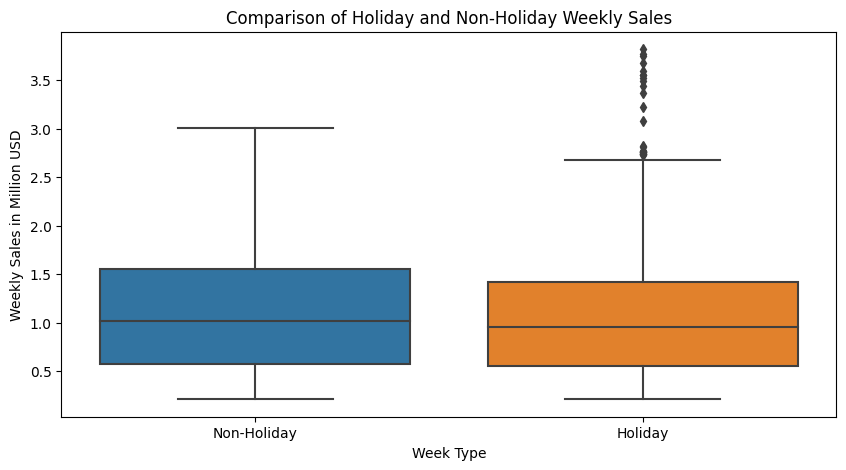

In [18]:
# Filter out non-holiday and holiday weekly sales
non_holiday_sales = df[df['Holiday_Flag'] == 0]
holiday_sales = df[df['Holiday_Flag'] == 1]

# Create boxplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[holiday_sales['Weekly_Sales']/1e6, non_holiday_sales['Weekly_Sales']/1e6], ax=ax)

# Labeling the x-axis categories
ax.set_xticklabels(['Non-Holiday', 'Holiday'])

# Adding labels and title
ax.set_ylabel('Weekly Sales in Million USD')
ax.set_xlabel('Week Type')
ax.set_title('Comparison of Holiday and Non-Holiday Weekly Sales')

# Show the plot
plt.show()

**Observation**:
- Both holiday and non-holiday weekly sales have a similar spread (range and interquartile range).
- Holiday weeks show higher peak sales, with larger values in the upper tail.
- The distribution of sales is comparable in variability for both holiday and non-holiday weeks.

**Correlating Features**

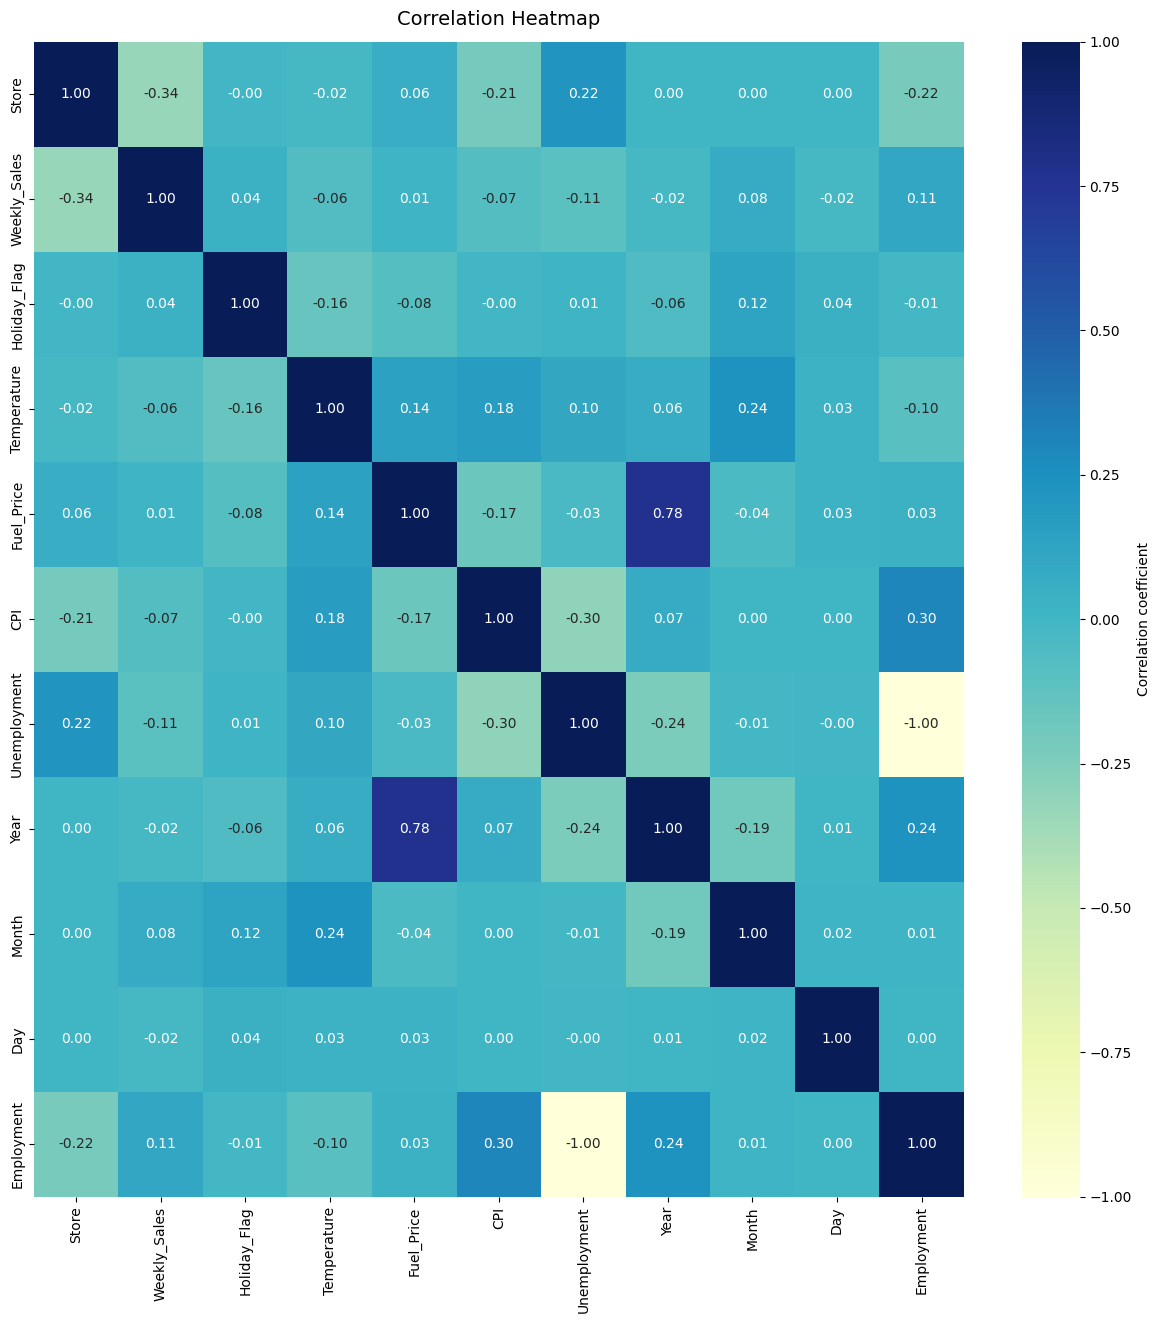

In [19]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(15, 15))

# Ensure that we only show correlations for numerical columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, 
                      vmin=-1, vmax=1, 
                      annot=True, 
                      cmap="YlGnBu", 
                      fmt=".2f", 
                      cbar_kws={'label': 'Correlation coefficient'})

# Title for the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)

# Show the plot
plt.show()


**Observation**:
- No strong correlation exists between Weekly Sales and other features.
- Moderate negative correlation (-0.34) between Store and Weekly Sales suggests older stores perform better.
- Weak positive correlation (0.11) between Employment and Weekly Sales indicates higher employment may slightly boost sales.

### Building the Regression Models

This section focuses on preparing the data for modeling, implementing various regression models, and evaluating their performance using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score. It uses a standardized pipeline for data scaling, splitting, and model evaluation, enabling a fair comparison across models.

**Data Preparation**

In [20]:
# Drop Repetitive Features
df.drop(['Date', 'Unemployment'], axis=1, inplace=True)

In [21]:
# Separating X and y
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']


# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

**Evaluation Framework**

In [22]:
"""
Fits the model on training data, predicts on test data, 
and calculates MSE, RMSE, and R² Score.
"""

# Define a function to evaluate a model's MSE, RMSE, and R² Score
def evaluate_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R² Score
    return mse, rmse, r2

In [23]:
# Initialize Regressors
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [24]:
# Collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor]

# Collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression"]

**Model Evaluation**

In [25]:
"""
Evaluates multiple regressors and returns a DataFrame containing
the MSE, RMSE, and R² Score for each model.
"""

# Function to evaluate multiple regressors and return their performance metrics
def evaluate_regressors_metrics(regressors, regressor_names, X_train, y_train, X_test, y_test):
    
    metrics = []  # Initialize an empty list to store the metrics for each regressor

    # Loop through each regressor in the 'regressors' list
    for regressor in regressors:

        # Evaluate the model by calling the 'evaluate_model' function for each regressor
        mse, rmse, r2 = evaluate_model(regressor, X_train, y_train, X_test, y_test)
        
        # Append the performance metrics (MSE, RMSE, R²) as a list to the 'metrics' list
        metrics.append([mse, rmse, r2])
    
    # Columns are named 'MSE', 'RMSE', 'R2'
    metrics_df = pd.DataFrame(metrics, columns=['MSE', 'RMSE', 'R2'])
    
    # Add a new column 'Regressor' to the DataFrame to label each model
    metrics_df['Regressor'] = regressor_names
    
    # Return the sorted DataFrame by RMSE in ascending order, with the index reset
    return metrics_df.sort_values('RMSE', ascending=True, ignore_index=True)



In [26]:
# Evaluate Regressors and Generate MSE & RMSE Table
metrics_df = evaluate_regressors_metrics(regressors, regressor_names, X_train, y_train, X_test, y_test)

# Display the Table of Regressors and Their Metrics
print("\033[1mTable of Regressors and their MSE, RMSE, and R² Score:\033[0m")
print(metrics_df)

Table of Regressors and their MSE, RMSE, and R² Score:
             MSE          RMSE        R2                       Regressor
0   1.147442e+10  1.071187e+05  0.963599        Random Forest Regression
1   1.913094e+10  1.383146e+05  0.939311        Decision Tree Regression
2   2.906198e+10  1.704757e+05  0.907806         Boosted Tree Regression
3   1.744503e+11  4.176724e+05  0.446588               Spline Regression
4   1.965219e+11  4.433079e+05  0.376570  K-Nearest Neighbour Regression
5   2.249775e+11  4.743180e+05  0.286299           Polynomial Regression
6   2.692763e+11  5.189184e+05  0.145770                Ridge Regression
7   2.692767e+11  5.189188e+05  0.145768                Lasso Regression
8   2.692768e+11  5.189188e+05  0.145768               Linear Regression
9   2.748513e+11  5.242626e+05  0.128084          Elastic Net Regression
10  3.235320e+11  5.687987e+05 -0.026347       Support Vector Regression
11  1.403485e+12  1.184688e+06 -3.452302       Neural Network Regress

In [27]:
# Extract the best model details
best_model_index = metrics_df['RMSE'].idxmin()  # Index of the model with the lowest RMSE
best_model_name = metrics_df.iloc[best_model_index]['Regressor']  # Best model name
best_rmse = metrics_df.iloc[best_model_index]['RMSE']  # Best RMSE score
best_r2 = metrics_df.iloc[best_model_index]['R2']  # Best R² score

# Calculate the percentage deviation
median_sale = df['Weekly_Sales'].median()  # Median sales value
percent_deviation = round((best_rmse * 100 / median_sale), 2)  # Percentage error

# Print the results
print(f"Best Model: {best_model_name}")
print(f"Best Model RMSE: {best_rmse}")
print(f"Best Model R²: {best_r2}")
print(f"The best model has an average percentage error of {percent_deviation}%.")


Best Model: Random Forest Regression
Best Model RMSE: 107118.73922394321
Best Model R²: 0.963599463168421
The best model has an average percentage error of 11.15%.


### Results and Discussion

The **Random Forest Regression** model performed the best, with an **RMSE** of **107,795.56** and an **R²** of **0.9631**, explaining **96.31%** of the variance in weekly sales. Its average percentage error was **11.22%**, indicating reliable predictions.

Other models like **Decision Tree** and **Boosted Tree Regression** performed well but had higher RMSE values. In contrast, linear models like **Ridge** and **Lasso Regression** had significantly lower performance, with both R² scores coming out to **0.1457**.

These results suggest that non-linear models, especially **Random Forest**, are most effective for predicting weekly sales, highlighting their ability to capture complex data relationships. Future work could focus on further model optimization and fine-tuning.

### Conclusion
In analyzing the relationship between store features and weekly sales, we observed an interesting trend: lower-numbered stores seem to perform better than higher-numbered stores. This could be attributed to various factors, such as the age of the store or its recency in entering the market. However, no strong correlations were found between weekly sales and other features, suggesting that additional factors or more complex interactions may be influencing sales trends.

Among the evaluated models, **Random Forest Regression** outperformed others in terms of predictive accuracy. It achieved the lowest RMSE (107,795.56) and the **highest R² score (0.0.9631),** indicating a strong fit to the data. The model’s average percentage error was 11.22%, which is relatively good given the variability in weekly sales data.

#### Next Steps and Future Improvements:
While Random Forest Regression emerged as the best model, there are still opportunities for further refinement.

**Cross-Validation and Hyperparameter Tuning:**

To improve the model's performance, it is essential to perform cross-validation (e.g., K-fold cross-validation) to ensure robustness and prevent overfitting.
Additionally, hyperparameter tuning through GridSearchCV or RandomizedSearchCV can help find the optimal settings for the model, particularly for Random Forest or Decision Tree models, which have several hyperparameters that can significantly influence their performance.

**Feature Engineering:**

More advanced feature engineering could be explored. For example, aggregating store data over time or introducing interaction terms between store features may capture more complex patterns in the data.

**Ensemble Methods:**

Exploring other ensemble methods like Gradient Boosting or XGBoost could potentially provide better results, especially if the dataset contains non-linear relationships or requires higher predictive accuracy.

**Model Evaluation:**

More comprehensive model evaluation could include additional metrics, such as mean absolute error (MAE), explained variance score, or cross-validated performance. This would give a broader understanding of the model's behavior.

By incorporating these improvements, we could further refine the predictions and potentially achieve even lower error rates in forecasting weekly sales.

#### Resources

Kaggle Walmart Dataset (https://www.kaggle.com/datasets/yasserh/walmart-dataset)